# Kaggle - Bike Sharing Demand
https://www.kaggle.com/c/bike-sharing-demand

## configuration

In [19]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 9999
pd.options.display.max_columns = 9999
pd.options.display.float_format = '{:.5f}'.format

import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
%matplotlib inline

## Load Dataset

* datetime - hourly date + timestamp  
* season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* count - number of total rentals

**train**

In [20]:
train = pd.read_csv("bike_train.csv", parse_dates=["datetime"])

print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84000,14.39500,81,0.00000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02000,13.63500,80,0.00000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02000,13.63500,80,0.00000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84000,14.39500,75,0.00000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84000,14.39500,75,0.00000,0,1,1


**test**

In [21]:
test = pd.read_csv("bike_test.csv", parse_dates=["datetime"])

print(test.shape)
test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66000,11.36500,56,26.00270
1,2011-01-20 01:00:00,1,0,1,1,10.66000,13.63500,56,0.00000
2,2011-01-20 02:00:00,1,0,1,1,10.66000,13.63500,56,0.00000
3,2011-01-20 03:00:00,1,0,1,1,10.66000,12.88000,56,11.00140
4,2011-01-20 04:00:00,1,0,1,1,10.66000,12.88000,56,11.00140


# 1. EDA & Data Processing

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [23]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


**결과**
* train데이터 총 10886개 중 10886개 모두 non-null이다.
* test데이터 총 6493개 중 6493개 모두 non-null이다.

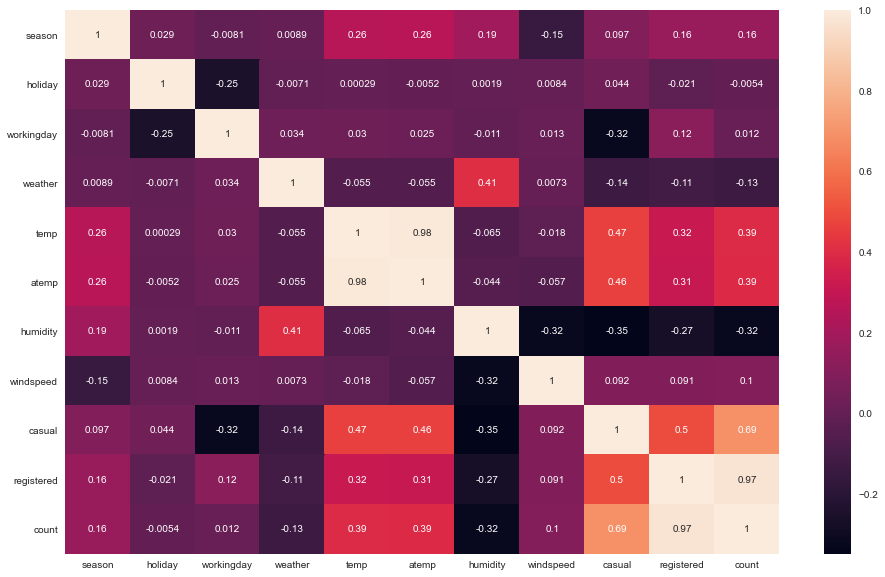

In [24]:
plt.figure(figsize=(16,10))
sns.heatmap(train.corr(), annot=True)

### 1. datetime

In [25]:
train['datetime']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

* 2011년 1월 1일 12시부터 2012년 12월 19일 23시까지 한시간 간격으로 표현되는 것으로 보인다.

In [26]:
train["datetime-year"] = train["datetime"].dt.year
train["datetime-month"] = train["datetime"].dt.month
train["datetime-day"] = train["datetime"].dt.day
train["datetime-hour"] = train["datetime"].dt.hour
train["datetime-dayofweek"] = train["datetime"].dt.dayofweek
train["datetime-year-month"] = train["datetime"].dt.strftime("%Y-%m")

print(train.shape)
train[["datetime", 
       "datetime-year", "datetime-month", "datetime-day", "datetime-hour", 
       "datetime-dayofweek", "datetime-year-month"]].head()

(10886, 18)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-dayofweek,datetime-year-month
0,2011-01-01 00:00:00,2011,1,1,0,5,2011-01
1,2011-01-01 01:00:00,2011,1,1,1,5,2011-01
2,2011-01-01 02:00:00,2011,1,1,2,5,2011-01
3,2011-01-01 03:00:00,2011,1,1,3,5,2011-01
4,2011-01-01 04:00:00,2011,1,1,4,5,2011-01


* year, month, day, hour, dayofweek를 각각 뽑아내어 분석한다.
* year-month 칼럼을 생성해준다.

In [27]:
test["datetime-year"] = test["datetime"].dt.year
test["datetime-month"] = test["datetime"].dt.month
test["datetime-day"] = test["datetime"].dt.day
test["datetime-hour"] = test["datetime"].dt.hour
test["datetime-dayofweek"] = test["datetime"].dt.dayofweek
test["datetime-year-month"] = test["datetime"].dt.strftime("%Y-%m")

print(test.shape)
test[["datetime", 
       "datetime-year", "datetime-month", "datetime-day", "datetime-hour", 
       "datetime-dayofweek", "datetime-year-month"]].head()

(6493, 15)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-dayofweek,datetime-year-month
0,2011-01-20 00:00:00,2011,1,20,0,3,2011-01
1,2011-01-20 01:00:00,2011,1,20,1,3,2011-01
2,2011-01-20 02:00:00,2011,1,20,2,3,2011-01
3,2011-01-20 03:00:00,2011,1,20,3,3,2011-01
4,2011-01-20 04:00:00,2011,1,20,4,3,2011-01


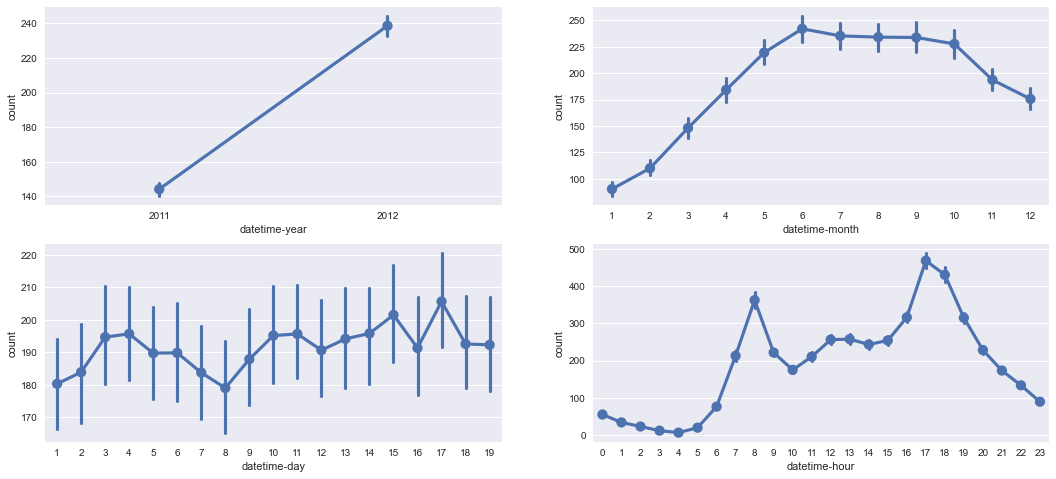

In [28]:
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)

figure.set_size_inches(18, 8)

sns.pointplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.pointplot(data=train, x="datetime-month", y="count", ax=ax2)
sns.pointplot(data=train, x="datetime-day", y="count", ax=ax3)
sns.pointplot(data=train, x="datetime-hour", y="count", ax=ax4)

* year를 보았을 때 2011년도 보다 2012년에 대여량이 많은 것으로 보인다.
* month를 보았을 때 대체로 여름에 겨울보다 대여량이 많은 것으로 보인다.
* hout칼럼을 확인했을 때 주로 출퇴근으로 짐작되는 시간에 대여량이 많은 것으로 보인다.

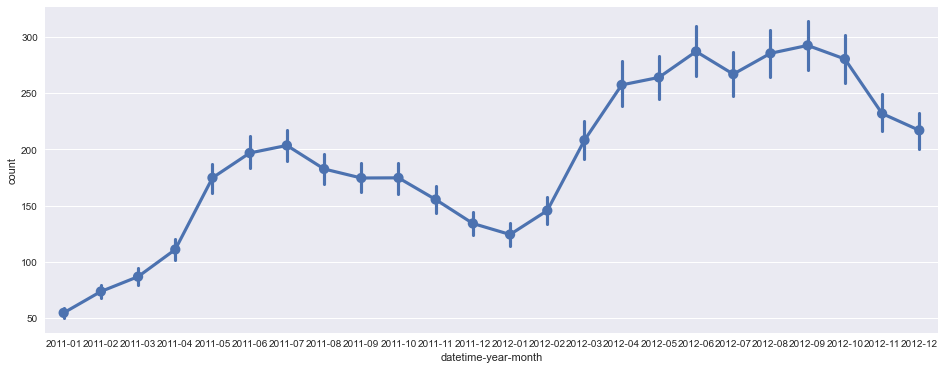

In [29]:
plt.figure(figsize=(16, 6))
sns.pointplot(data=train, x="datetime-year-month", y="count")

* 2012년으로 가면서 대여량이 늘어났으나 계절의 영향을 받고 있다.

**year, month**

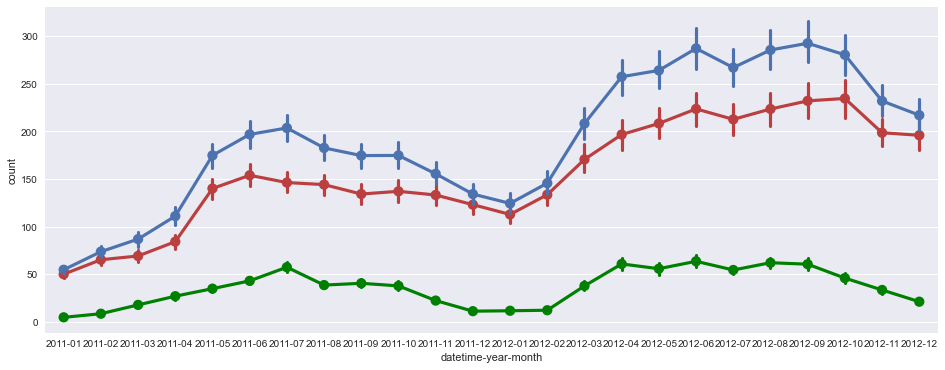

In [30]:
plt.figure(figsize=(16, 6))
sns.pointplot(data=train, x="datetime-year-month", y="registered", color="#bb3f3f")
sns.pointplot(data=train, x="datetime-year-month", y="casual", color = 'green')
sns.pointplot(data=train, x="datetime-year-month", y="count")

* registered가 casual보다 많으며 월별로 띄는 형태는 비슷한 것으로 보인다.
* 2011-1 ~ 2011-4, 2011-5 ~ 2011-11, 2011-12 ~ 2012-2, 2012-03 ~ 2012-02로 범주화 할 수 있을 것으로 보인다.

In [31]:
year_month = train['datetime-year-month'].unique()
train['year_month1'] = train['datetime-year-month'].isin(year_month[0:4])
train['year_month2'] = train['datetime-year-month'].isin(year_month[4:11])
train['year_month3'] = train['datetime-year-month'].isin(year_month[11:14])
train['year_month4'] = train['datetime-year-month'].isin(year_month[14:])

In [32]:
test['year_month1'] = test['datetime-year-month'].isin(year_month[0:4])
test['year_month2'] = test['datetime-year-month'].isin(year_month[4:11])
test['year_month3'] = test['datetime-year-month'].isin(year_month[11:14])
test['year_month4'] = test['datetime-year-month'].isin(year_month[14:])

**hour**

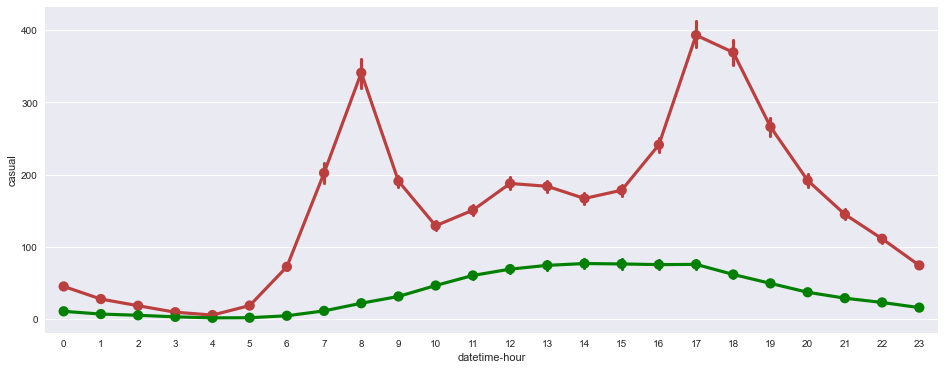

In [33]:
plt.figure(figsize=(16, 6))
sns.pointplot(data=train, x="datetime-hour", y="registered", color="#bb3f3f")
sns.pointplot(data=train, x="datetime-hour", y="casual", color = 'green')

* 출퇴근, 활동시간, 새벽시간으로 나누면 좋을 것 같다.
* 23시 ~ 6시
* 7, 8, 16~19시
* 9 ~ 15시, 20 ~ 22시 

In [34]:
train['hour1'] = train['datetime-hour'].isin([23, 0, 1, 2, 3 , 4, 5, 6])
train['hour2'] = train['datetime-hour'].isin([9, 10, 11, 12, 13, 14, 15, 20, 21, 22])
train['hour3'] = train['datetime-hour'].isin([7, 8, 16, 17, 18, 19])

In [35]:
test['hour1'] = test['datetime-hour'].isin([23, 0, 1, 2, 3 , 4, 5, 6])
test['hour2'] = test['datetime-hour'].isin([9, 10, 11, 12, 13, 14, 15, 20, 21, 22])
test['hour3'] = test['datetime-hour'].isin([7, 8, 16, 17, 18, 19])

### Season

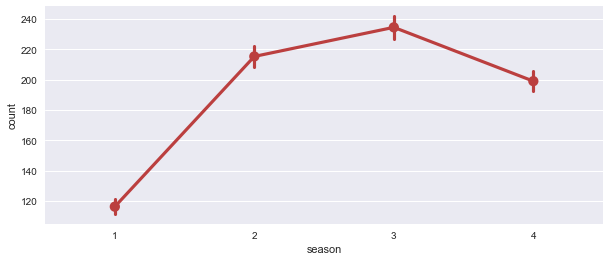

In [36]:
plt.figure(figsize=(10, 4))
sns.pointplot(data=train, x="season", y="count", color="#bb3f3f")

* 겨울을 제외하고는 대여량이 높다.

In [37]:
print(train.loc[train['season']==1, 'datetime-month'].unique())
print(train.loc[train['season']==2, 'datetime-month'].unique())
print(train.loc[train['season']==3, 'datetime-month'].unique())
print(train.loc[train['season']==4, 'datetime-month'].unique())

[1 2 3]
[4 5 6]
[7 8 9]
[10 11 12]


* 계절 기준이 약간 모호해보인다.

### holiday, workingday

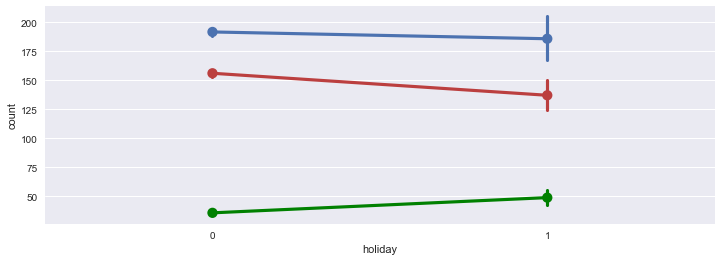

In [38]:
plt.figure(figsize=(12, 4))
sns.pointplot(data=train, x="holiday", y="registered", color="#bb3f3f")
sns.pointplot(data=train, x="holiday", y="casual", color = 'green')
sns.pointplot(data=train, x="holiday", y="count")

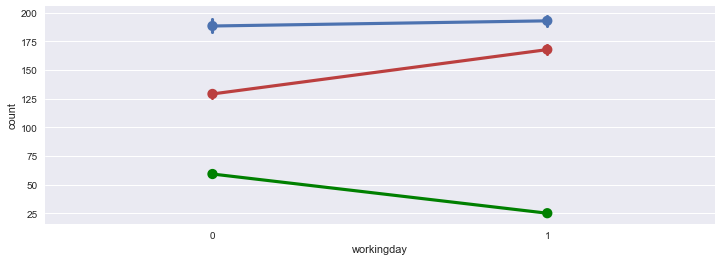

In [39]:
plt.figure(figsize=(12, 4))
sns.pointplot(data=train, x="workingday", y="registered", color="#bb3f3f")
sns.pointplot(data=train, x="workingday", y="casual", color = 'green')
sns.pointplot(data=train, x="workingday", y="count")

In [40]:
train['h-w'] = train['holiday'].astype('str') + train['workingday'].astype('str')
test['h-w'] = test['holiday'].astype('str') + test['workingday'].astype('str')

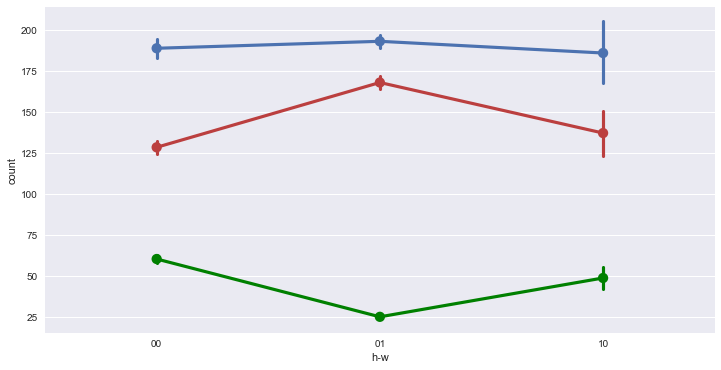

In [41]:
plt.figure(figsize=(12, 6))
sns.pointplot(data=train, x="h-w", y="registered", color="#bb3f3f")
sns.pointplot(data=train, x="h-w", y="casual", color = 'green')
sns.pointplot(data=train, x="h-w", y="count")

* holiday, workingday 정보를 합쳤을 때 가장 count변화가 있는 것으로 보인다.

In [42]:
train['h_w1'] = train['h-w'] == '00'
train['h_w2'] = train['h-w'] == '10'
train['h_w3'] = train['h-w'] == '01'

In [43]:
test['h_w1'] = test['h-w'] == '00'
test['h_w2'] = test['h-w'] == '10'
test['h_w3'] = test['h-w'] == '01'

# weather

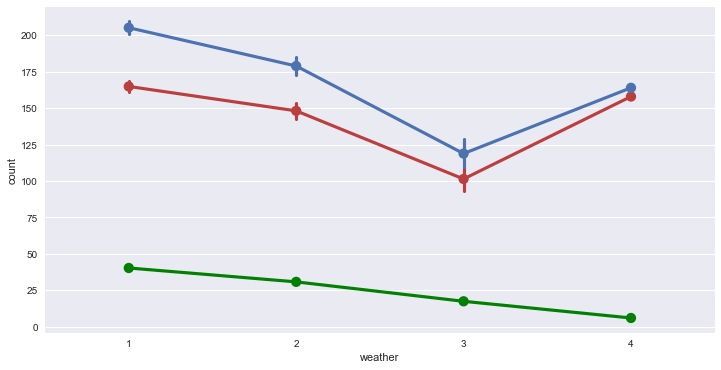

In [44]:
plt.figure(figsize=(12, 6))
sns.pointplot(data=train, x="weather", y="registered", color="#bb3f3f")
sns.pointplot(data=train, x="weather", y="casual", color = 'green')
sns.pointplot(data=train, x="weather", y="count")

* weather가 가장 안좋은 날(4) 대여량이 꽤 있다..

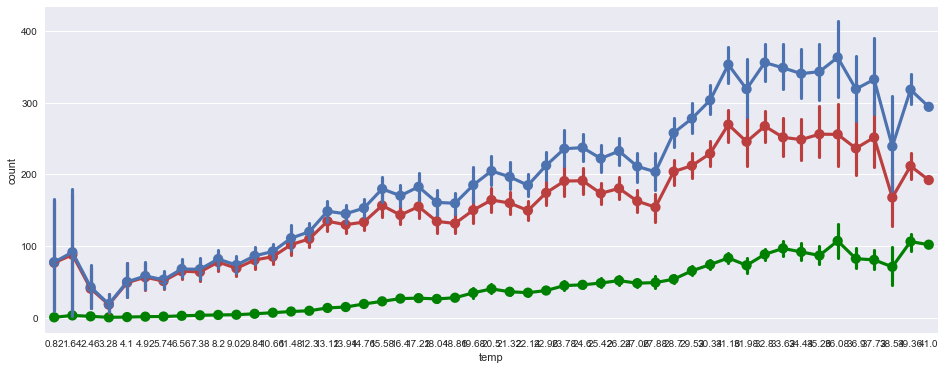

In [45]:
plt.figure(figsize=(16, 6))
sns.pointplot(data=train, x="temp", y="registered", color="#bb3f3f")
sns.pointplot(data=train, x="temp", y="casual", color = 'green')
sns.pointplot(data=train, x="temp", y="count")

* 날씨가 따뜻할 수록 대여량이 많은 것으로 보인다.

# 2. Regression Modeling 

## configuration

In [46]:
# sklearn 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
#from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [47]:
train.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-dayofweek,datetime-year-month,year_month1,year_month2,year_month3,year_month4,hour1,hour2,hour3,h-w,h_w1,h_w2,h_w3
0,2011-01-01,1,0,0,1,9.84000,14.39500,81,0.00000,3,13,16,2011,1,1,0,5,2011-01,True,False,False,False,True,False,False,00,True,False,False


In [60]:
# target 분리, data split
y = train['count']
X = train[['season', 'weather', 'temp', "atemp", "humidity", "windspeed",
           'year_month1', 'year_month2', 'year_month3', 'year_month4',
           "datetime-dayofweek", "datetime-year", "datetime-hour",
           'hour1', 'hour2', 'hour3',
           'h_w1', 'h_w2', 'h_w3'
          ]]
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.3, random_state=318)

In [61]:
n_folds = 5
def rmse_cv(model):
  kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
  rmse = np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring='neg_mean_squared_error', cv=kf))
  return (rmse)

In [62]:
def rmse(y,y_pred):
  return np.sqrt(mean_squared_error(y,y_pred))

### Base models  

**LinearRegression**

In [63]:
lr = LinearRegression()

**DecisionTreeRegressor**

In [70]:
dt = DecisionTreeRegressor(max_depth=10,
                         max_features = 0.86751,
                         random_state=1004)

In [66]:
num_epoch = 100

coarse_hyperparameters_list = []

for epoch in range(num_epoch):
    max_depth = np.random.randint(low=2, high=50)
    max_features = np.random.uniform(low=0.1, high=1.0)

    dt_test = DecisionTreeRegressor(max_depth=max_depth,
                                  max_features=max_features,
                                  random_state=1004)

    score = rmse_cv(dt_test).mean()
    
    hyperparameters = {
        'epoch': epoch,
        'score': score,
        'max_depth': max_depth,
        'max_features': max_features,
    }

    coarse_hyperparameters_list.append(hyperparameters)

    #print(f"{epoch:2} \
    #    max_depth = {max_depth:2}, max_features = {max_features:.6f}, \
    #    Score = {score:.5f}")

coarse_hyperparameters_list = pd.DataFrame.from_dict(coarse_hyperparameters_list)
coarse_hyperparameters_list = coarse_hyperparameters_list.sort_values(by="score")

print(coarse_hyperparameters_list.shape)
coarse_hyperparameters_list.head(10)

(100, 4)


,epoch,score,max_depth,max_features
76,76,64.96605,10,0.86751
19,19,65.61283,45,0.98303
15,15,65.61283,48,0.96093
71,71,65.61283,27,0.98184
55,55,65.61283,32,0.97826
35,35,65.76199,12,0.75288
66,66,66.16974,12,0.82316
2,2,67.38689,30,0.85316
20,20,67.38689,44,0.88385
37,37,67.38689,46,0.88549


**KNeighborsRegressor**

In [71]:
knn = KNeighborsRegressor(n_neighbors = 6,
                          weights = 'distance',
                          metric='manhattan')

In [68]:
num_epoch = 100
coarse_hyperparameters_list = []

for epoch in range(num_epoch):
    n_neighbors = np.random.randint(low=2, high=150)
    weights = np.random.choice(['uniform', 'distance'])
    metric = np.random.choice(['minkowski', 'euclidean', 'manhattan'])

    knn_test = KNeighborsRegressor(n_neighbors=n_neighbors,
                                  weights=weights,
                                  metric=metric)

    score = rmse_cv(knn_test).mean()
    
    hyperparameters = {
        'epoch': epoch,
        'score': score,
        'n_neighbors': n_neighbors,
        'weights': weights,
        'metric': metric,
    }

    coarse_hyperparameters_list.append(hyperparameters)

    #print(f"{epoch:2} \
    #    n_neighbors = {n_neighbors}, weights = {weights}, metric = {metric}, \
    #    Score = {score:.5f}")

coarse_hyperparameters_list = pd.DataFrame.from_dict(coarse_hyperparameters_list)
coarse_hyperparameters_list = coarse_hyperparameters_list.sort_values(by="score")

print(coarse_hyperparameters_list.shape)
coarse_hyperparameters_list.head(10)

(100, 5)


,epoch,score,n_neighbors,weights,metric
74,74,106.07589,6,distance,manhattan
32,32,107.40701,10,uniform,manhattan
17,17,108.84556,23,distance,manhattan
72,72,109.55506,26,distance,manhattan
22,22,110.40434,17,uniform,manhattan
23,23,112.21201,36,distance,manhattan
79,79,112.74566,23,uniform,manhattan
96,96,113.08062,41,distance,manhattan
87,87,114.36784,48,distance,manhattan
2,2,115.36509,54,distance,manhattan


**RandomForestRegressor**

In [72]:
rf = make_pipeline(RandomForestRegressor(n_estimators = 1000,
                                         max_depth = 47,
                                         max_features = 0.61204,
                                         min_samples_split = 19,
                                         min_samples_leaf = 4,
                                         random_state=37))

In [109]:
n_estimators = 300 # 3000까지 늘려보자
num_epoch = 100

coarse_hyperparameters_list = []

for epoch in range(num_epoch):
    max_depth = np.random.randint(low=2, high=100)
    max_features = np.random.uniform(low=0.1, high=1.0)
    min_samples_split = np.random.randint(low=2, high=50)
    min_samples_leaf = np.random.randint(low=1, high=50)
    
    rf_test = RandomForestRegressor(n_estimators=n_estimators,
                                  max_depth=max_depth,
                                  max_features=max_features,
                                    min_samples_split = min_samples_split,
                                    min_samples_leaf = min_samples_leaf,
                                  n_jobs=-1,
                                  random_state=37)

    score = rmse_cv(rf_test).mean()
    
    hyperparameters = {
        'epoch': epoch,
        'score': score,
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'max_features': max_features,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
    }

    coarse_hyperparameters_list.append(hyperparameters)

    print(f"{epoch:2} \
        n_estimators = {n_estimators}, max_depth = {max_depth:2}, max_features = {max_features:.6f}, \
        min_samples_split = {min_samples_split:2}, min_samples_leaf = {min_samples_leaf:2},\
        Score = {score:.5f}")

coarse_hyperparameters_list = pd.DataFrame.from_dict(coarse_hyperparameters_list)
coarse_hyperparameters_list = coarse_hyperparameters_list.sort_values(by="score")

print(coarse_hyperparameters_list.shape)
coarse_hyperparameters_list.head(10)

 0         n_estimators = 300, max_depth = 77, max_features = 0.707493,         min_samples_split =  7, min_samples_leaf = 33,        Score = 89.88933
 1         n_estimators = 300, max_depth = 37, max_features = 0.767726,         min_samples_split = 36, min_samples_leaf = 10,        Score = 86.32067
 2         n_estimators = 300, max_depth = 38, max_features = 0.565177,         min_samples_split = 21, min_samples_leaf = 45,        Score = 91.06774
 3         n_estimators = 300, max_depth = 90, max_features = 0.903424,         min_samples_split = 45, min_samples_leaf =  2,        Score = 86.17479
 4         n_estimators = 300, max_depth = 90, max_features = 0.271853,         min_samples_split = 20, min_samples_leaf = 47,        Score = 93.51605
 5         n_estimators = 300, max_depth = 84, max_features = 0.800839,         min_samples_split = 47, min_samples_leaf = 42,        Score = 90.87894
 6         n_estimators = 300, max_depth =  2, max_features = 0.588757,         min_samples_sp

55         n_estimators = 300, max_depth = 82, max_features = 0.940643,         min_samples_split = 46, min_samples_leaf = 20,        Score = 88.14252
56         n_estimators = 300, max_depth = 79, max_features = 0.869564,         min_samples_split = 22, min_samples_leaf =  1,        Score = 85.71718
57         n_estimators = 300, max_depth = 13, max_features = 0.693433,         min_samples_split = 21, min_samples_leaf = 20,        Score = 88.09780
58         n_estimators = 300, max_depth = 18, max_features = 0.877968,         min_samples_split = 37, min_samples_leaf = 18,        Score = 87.53445
59         n_estimators = 300, max_depth = 51, max_features = 0.750765,         min_samples_split = 13, min_samples_leaf = 39,        Score = 90.63959
60         n_estimators = 300, max_depth = 46, max_features = 0.325960,         min_samples_split = 12, min_samples_leaf = 16,        Score = 87.99326
61         n_estimators = 300, max_depth = 44, max_features = 0.971965,         min_samples_sp

,epoch,score,n_estimators,max_depth,max_features,min_samples_split,min_samples_leaf
96,96,85.36623,300,47,0.61204,19,4
19,19,85.42354,300,96,0.25586,2,5
17,17,85.43377,300,13,0.62719,26,2
46,46,85.51639,300,40,0.70259,20,2
24,24,85.57385,300,73,0.75420,30,2
92,92,85.57863,300,8,0.99578,19,7
71,71,85.58451,300,64,0.19852,14,3
82,82,85.59620,300,74,0.58087,7,7
83,83,85.62476,300,81,0.30889,11,3
39,39,85.68762,300,18,0.64751,6,4


**GradientBoostingRegressor**

In [73]:
gbm = make_pipeline(GradientBoostingRegressor(n_estimators = 300, learning_rate=0.00976,
                                              max_depth=19, max_features='sqrt',
                                              min_samples_leaf=16, min_samples_split=4,
                                              loss = 'huber', random_state=37))

In [111]:
n_estimators = 300 # 3000까지 늘려보자
num_epoch = 50

coarse_hyperparameters_list = []

for epoch in range(num_epoch):
    max_depth = np.random.randint(low=2, high=100)
    learning_rate = np.random.uniform(low=0.000001, high=0.01)
    min_samples_leaf = np.random.randint(low=5, high=50)
    min_samples_split = np.random.randint(low=3, high=50)

    gbm_test = GradientBoostingRegressor(n_estimators=n_estimators,
                                  max_depth=max_depth,
                                  learning_rate=learning_rate,
                                  min_samples_leaf=min_samples_leaf,
                                      min_samples_split = min_samples_split,
                                      max_features='sqrt', loss = 'huber',
                                  random_state=37)

    score = rmse_cv(gbm_test).mean()
    
    hyperparameters = {
        'epoch': epoch,
        'score': score,
        'learning_rate': learning_rate,
        'max_depth': max_depth,
        'min_samples_leaf': min_samples_leaf,
        'min_samples_split': min_samples_split,
    }

    coarse_hyperparameters_list.append(hyperparameters)

    print(f"{epoch:2} \
        learning_rate = {learning_rate}, max_depth = {max_depth:2}, min_samples_leaf = {min_samples_leaf}, \
        min_samples_split = {min_samples_split},\
        Score = {score:.5f}")

coarse_hyperparameters_list = pd.DataFrame.from_dict(coarse_hyperparameters_list)
coarse_hyperparameters_list = coarse_hyperparameters_list.sort_values(by="score")

print(coarse_hyperparameters_list.shape)
coarse_hyperparameters_list.head(10)

 0         learning_rate = 0.008201901247920855, max_depth = 53, min_samples_leaf = 19,         min_samples_split = 8,        Score = 87.39099
 1         learning_rate = 0.009944440343880128, max_depth = 58, min_samples_leaf = 32,         min_samples_split = 18,        Score = 86.83811
 2         learning_rate = 0.007354922939161016, max_depth = 42, min_samples_leaf = 35,         min_samples_split = 7,        Score = 89.67542
 3         learning_rate = 0.005281394126294151, max_depth = 39, min_samples_leaf = 47,         min_samples_split = 14,        Score = 96.58578
 4         learning_rate = 0.004091669062146108, max_depth = 75, min_samples_leaf = 31,         min_samples_split = 42,        Score = 102.47173
 5         learning_rate = 0.0047824403774107726, max_depth = 83, min_samples_leaf = 41,         min_samples_split = 41,        Score = 98.91587
 6         learning_rate = 0.009761741036453159, max_depth = 19, min_samples_leaf = 16,         min_samples_split = 4,        Score = 86

,epoch,score,learning_rate,max_depth,min_samples_leaf,min_samples_split
6,6,86.37184,0.00976,19,16,4
46,46,86.52571,0.00941,97,13,38
9,9,86.71955,0.00895,70,17,47
1,1,86.83811,0.00994,58,32,18
28,28,87.21034,0.00875,11,25,47
48,48,87.22470,0.00825,18,16,41
0,0,87.39099,0.00820,53,19,8
43,43,87.39695,0.00945,56,38,47
11,11,87.96901,0.00898,51,41,47
29,29,88.08780,0.00899,53,5,23


**XGBRegressor**

In [74]:
xgb_model = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.01, max_depth=35, 
                             min_child_weight=1.7817, n_estimators=200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =1004, nthread = -1)

**LGBMRegressor**

In [75]:
lgb_model = lgb.LGBMRegressor(objective='regression', max_depth= 69,
                              num_leaves=7, learning_rate=0.08698, n_estimators=300) 

In [112]:
n_estimators = 300 # 3000까지 늘려보자
num_epoch = 80

coarse_hyperparameters_list = []

for epoch in range(num_epoch):
    max_depth = np.random.randint(low=2, high=100)
    learning_rate = np.random.uniform(low=0.000001, high=0.1)
    num_leaves = np.random.randint(low=2, high=100)

    lgb_test = lgb.LGBMRegressor(objective='regression', 
                                 n_estimators = n_estimators,
                                 num_leaves= num_leaves, 
                                 max_depth = max_depth,
                                 learning_rate=learning_rate
                                ) 

    score = rmse_cv(lgb_test).mean()
    
    hyperparameters = {
        'epoch': epoch,
        'score': score,
        'learning_rate': learning_rate,
        'max_depth': max_depth,
        'num_leaves': num_leaves,
    }

    coarse_hyperparameters_list.append(hyperparameters)

    print(f"{epoch:2} \
        learning_rate = {learning_rate}, max_depth = {max_depth:2}, num_leaves = {num_leaves}, \
        Score = {score:.5f}")

coarse_hyperparameters_list = pd.DataFrame.from_dict(coarse_hyperparameters_list)
coarse_hyperparameters_list = coarse_hyperparameters_list.sort_values(by="score")

print(coarse_hyperparameters_list.shape)
coarse_hyperparameters_list.head(10)

 0         learning_rate = 0.029964436762650353, max_depth = 58, num_leaves = 61,         Score = 85.27719
 1         learning_rate = 0.0707530153390303, max_depth = 17, num_leaves = 6,         Score = 84.56765
 2         learning_rate = 0.006919746933122154, max_depth = 23, num_leaves = 55,         Score = 88.15753
 3         learning_rate = 0.08452332105188051, max_depth = 90, num_leaves = 28,         Score = 85.42206
 4         learning_rate = 0.005070388834092778, max_depth = 61, num_leaves = 39,         Score = 93.74685
 5         learning_rate = 0.0767177138536767, max_depth = 27, num_leaves = 46,         Score = 86.16198
 6         learning_rate = 0.08112354348054403, max_depth = 84, num_leaves = 65,         Score = 87.01877
 7         learning_rate = 0.021622407786833695, max_depth = 16, num_leaves = 30,         Score = 84.67392
 8         learning_rate = 0.07921817479634294, max_depth = 47, num_leaves = 94,         Score = 87.98846
 9         learning_rate = 0.0985425186919565

78         learning_rate = 0.06336248149449833, max_depth = 61, num_leaves = 68,         Score = 86.66330
79         learning_rate = 0.06123165319671369, max_depth = 77, num_leaves = 79,         Score = 86.96492
(80, 5)


,epoch,score,learning_rate,max_depth,num_leaves
68,68,84.24543,0.08698,69,7
58,58,84.45399,0.06014,67,19
26,26,84.47752,0.02870,10,25
63,63,84.48031,0.05696,11,14
39,39,84.49536,0.03913,95,25
77,77,84.52103,0.06045,74,16
61,61,84.55248,0.02143,87,22
1,1,84.56765,0.07075,17,6
55,55,84.61117,0.08774,32,14
37,37,84.63947,0.03246,21,15


### score

In [77]:
score = rmse_cv(dt)
print("\nDecision tree score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Decision tree score: 64.9661 (3.7753)



In [78]:
score = rmse_cv(knn)    
print("\nKNN score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


KNN score: 106.0759 (2.6811)



In [79]:
score = rmse_cv(rf)   
print("\nRandom Forest score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Random Forest score: 58.4866 (3.5351)



In [80]:
score = rmse_cv(gbm)
print("\nGBM score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


GBM score: 58.7969 (2.5224)



In [81]:
score = rmse_cv(xgb_model) 
print("\nXGBoost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[23:49:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:50:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:50:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through t

In [82]:
score = rmse_cv(lgb_model) 
print("\nLGBM score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


LGBM score: 45.6759 (2.9533)



# 3. Stacking models 

### Use StackingAveragedModels

In [83]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X.iloc[train_index], y.iloc[train_index])
                y_pred = instance.predict(X.iloc[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model 
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [84]:
stacked_averaged_models = StackingAveragedModels(base_models = [rf, knn ,lgb_model],
                                                 meta_model = rf)

stacked_averaged_models.fit(X_train, y_train)

StackingAveragedModels(base_models=[Pipeline(steps=[('randomforestregressor',
                                                     RandomForestRegressor(max_depth=47,
                                                                           max_features=0.61204,
                                                                           min_samples_leaf=4,
                                                                           min_samples_split=19,
                                                                           n_estimators=1000,
                                                                           random_state=37))]),
                                    KNeighborsRegressor(metric='manhattan',
                                                        n_neighbors=6,
                                                        weights='distance'),
                                    LGBMRegressor(learning_rate=0.08698,
                                                  max_dep

In [85]:
stacked_train_pred = stacked_averaged_models.predict(X_test)
print(rmse(y_test, stacked_train_pred))

48.758673814647395


### Use StackingRegressor

In [86]:
from sklearn.ensemble import StackingRegressor

# 파라미터 설정
estimators = [
              ('knn', knn),
              ('rf',rf),
              ('lgb',lgb_model)
]
              
# Stacking
reg = StackingRegressor(
    estimators = estimators,
    final_estimator = RandomForestRegressor(n_estimators = 1000,
                                         max_depth = 47,
                                         max_features = 0.61204,
                                         min_samples_split = 19,
                                         min_samples_leaf = 4,
                                         random_state=37),
    cv = 10,
    n_jobs=3,
    verbose=3
    )

# fit
reg.fit(X_train, y_train)

StackingRegressor(cv=10,
                  estimators=[('knn',
                               KNeighborsRegressor(metric='manhattan',
                                                   n_neighbors=6,
                                                   weights='distance')),
                              ('rf',
                               Pipeline(steps=[('randomforestregressor',
                                                RandomForestRegressor(max_depth=47,
                                                                      max_features=0.61204,
                                                                      min_samples_leaf=4,
                                                                      min_samples_split=19,
                                                                      n_estimators=1000,
                                                                      random_state=37))])),
                              ('lgb',
                               LGBMRegre

In [87]:
rmse(y_test, reg.predict(X_test))

48.44268869988874